## Setup

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['dog','cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['dog','cat'], batch_size=10)


In [ ]:
# plots images with labels within jupter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [29]:
imgs, labels = next(train_batches)

/Users/shinokada/virtualenvs/jupyter/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


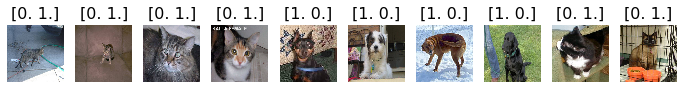

In [30]:
plots(imgs, titles=labels)

## Build and train CNN 

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [32]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 1s - loss: 779.3059 - accuracy: 0.5750 - val_loss: 547.6621 - val_accuracy: 0.5625
Epoch 2/5
 - 1s - loss: 1099.2246 - accuracy: 0.4872 - val_loss: 185.3357 - val_accuracy: 0.5000
Epoch 3/5
 - 1s - loss: 652.3427 - accuracy: 0.6000 - val_loss: 913.1320 - val_accuracy: 0.4375
Epoch 4/5
 - 1s - loss: 471.1897 - accuracy: 0.4750 - val_loss: 1039.1703 - val_accuracy: 0.3125
Epoch 5/5
 - 1s - loss: 590.2546 - accuracy: 0.4500 - val_loss: 404.4309 - val_accuracy: 0.5000


## Predict 

/Users/shinokada/virtualenvs/jupyter/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


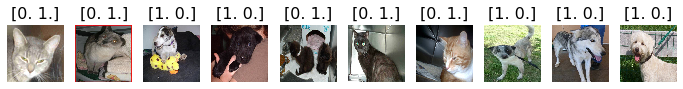

In [34]:
test_imgs, test_lables = next(test_batches)
plots(test_imgs, titles=test_lables)

In [35]:
test_lables = test_lables[:,0]
test_lables 

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [36]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [37]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
cm = confusion_matrix(test_lables, predictions[:,0])

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


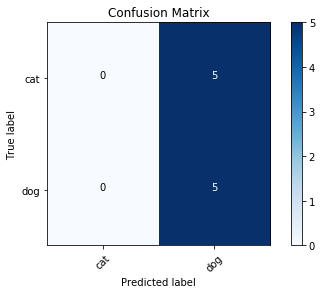

In [40]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

## Build Fine-tuned VGG16 module

In [41]:
vgg16_model = keras.applications.vgg16.VGG16()

In [42]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [65]:
type(vgg16_model)

keras.engine.training.Model

In [66]:
# since pop() won't work, useing [:-1] to exclude it
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [68]:
# model._layers.pop()

In [69]:
#model.summary()

In [70]:
for layer in model.layers:
    layer.traunable = False

In [71]:
model.add(Dense(2, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fine-tuned VGG16 model

In [73]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 91s - loss: 0.6225 - accuracy: 0.7500 - val_loss: 0.7589 - val_accuracy: 0.6875
Epoch 2/5
 - 82s - loss: 0.4601 - accuracy: 0.8000 - val_loss: 0.4799 - val_accuracy: 0.7500
Epoch 3/5
 - 122s - loss: 0.5110 - accuracy: 0.8000 - val_loss: 0.2074 - val_accuracy: 0.6875
Epoch 4/5
 - 87s - loss: 0.3850 - accuracy: 0.8000 - val_loss: 0.5987 - val_accuracy: 0.6875
Epoch 5/5
 - 93s - loss: 0.4331 - accuracy: 0.7250 - val_loss: 0.0334 - val_accuracy: 0.9375


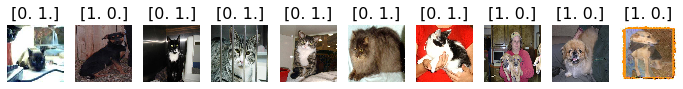

In [84]:
test_imgs, test_lables = next(test_batches)
plots(test_imgs, titles=test_lables)

In [85]:
test_lables = test_lables[:,0]
test_lables 

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [92]:
predictions = model.predict_generator(test_batches, steps=20, verbose=0)

In [93]:
predictions

array([[8.27107906e-01, 1.72892079e-01],
       [9.78815436e-01, 2.11845357e-02],
       [3.05075693e-04, 9.99694943e-01],
       [2.52284203e-02, 9.74771559e-01],
       [1.41550779e-01, 8.58449221e-01],
       [2.71782666e-01, 7.28217363e-01],
       [4.56107361e-03, 9.95438993e-01],
       [1.73375368e-01, 8.26624632e-01],
       [2.56234668e-02, 9.74376500e-01],
       [2.49587069e-03, 9.97504175e-01],
       [5.98411774e-03, 9.94015813e-01],
       [1.10741779e-01, 8.89258146e-01],
       [3.36994916e-01, 6.63005054e-01],
       [3.59365970e-01, 6.40634000e-01],
       [4.83539626e-02, 9.51646090e-01],
       [1.59804560e-02, 9.84019518e-01],
       [1.19814929e-02, 9.88018513e-01],
       [7.20828474e-01, 2.79171586e-01],
       [1.35962665e-01, 8.64037275e-01],
       [2.40256503e-01, 7.59743452e-01],
       [8.04589838e-02, 9.19541061e-01],
       [2.54408419e-02, 9.74559188e-01],
       [3.36297721e-01, 6.63702250e-01],
       [3.32658947e-01, 6.67340994e-01],
       [2.349137

Confusion matrix, without normalization
[[0 5]
 [0 5]]


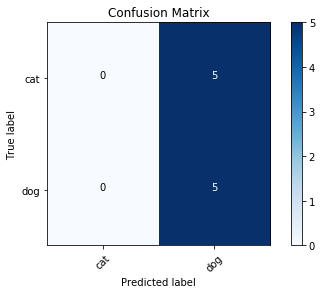

In [95]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')